# Different Flow Options


**_HydroGenerate_** allows entering flow in multiple formats. More advance functionality is avaliable when a time series of flow is avaliable. 

Using **_hydropower_type = Diversion_** allows computing hydropower potential for a _diversion_ or _run-of-river_ project. 


In [1]:
from HydroGenerate.hydropower_potential import calculate_hp_potential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1 Flow as a numpy array

When flow is a numpy array, **_HydroGenerate_** can select a design flow and calculate nameplate capacity, effiiency, and head losses for the given vlues of flow.

In [2]:
# Head, power, and length of penstock are known. Multiple values of flow are available, the design flow is not known.
# In this scenario HydroGenerate will select a turbine, compute efficiency for the given flow values,
# design flow based on a percent of exceedance, penstock diameter (assuming steel if no material is given),
# head loss for all flows, rater power,
# power a given range of flow, 

flow = pd.read_csv('data_test.csv')['discharge_cfs'].to_numpy() # cfs
head = 20 # ft
power = None
penstock_length = 50 # ft
hp_type = 'Diversion'
pctime_runfull= 20 # percent of time the turbine is running full - default is 30%

# Note: decreasing the percent of time the turbine will run full will result in a 
# larger system (rated power and cost)

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                           penstock_headloss_calculation= True,
                           hydropower_type= hp_type, penstock_length= penstock_length,
                           pctime_runfull= pctime_runfull)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter, 2))
print('Runner diameter (ft):', round(hp.runner_diameter, 2))

print('\nFlow range evaluated (cfs):', np.round(hp.flow, 1))
print('Turbine Efficiency for the given flow range:', np.round(hp.turbine_efficiency ,3))
print('Power (kW) for the given flow range:', np.round(hp.power, 1))

Design flow (cfs): 10800.0
Head_loss at design flow (ft): 1.88
Turbine type: Kaplan
Rated Power (Kw): 14828.83
Net head (ft): 18.12
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 50.0
Penstock diameter (ft): 18.73
Runner diameter (ft): 20.16

Flow range evaluated (cfs): [3260. 3270. 3250. ... 3170. 3100. 3150.]
Turbine Efficiency for the given flow range: [0.768 0.77  0.766 ... 0.751 0.736 0.747]
Power (kW) for the given flow range: [4118.3 4140.3 4096.2 ... 3917.7 3759.3 3872.7]


#### 2 Flow as Pandas dataframe with a datetime index - Additional functionality.

In [3]:
# 2.1) Using flow as a pandas dataframe adds annual energy calculation

# Note: When using a pandas dataframe as flow data, set the datetime index before 
# using HydroGenerate.  (https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)

flow = pd.read_csv('data_test.csv') # pandas data frame
flow['dateTime'] = pd.to_datetime(flow['dateTime']) # preprocessing convert to datetime
flow = flow.set_index('dateTime') # set datetime index # flolw is in cfs

head = 20 # ft
power = None
penstock_length = 50 # ft
hp_type = 'Diversion' 

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                            pctime_runfull = 30,
                            penstock_headloss_calculation= True,
                            design_flow= None,
                            electricity_sell_price = 0.05,
                            resource_category= 'CanalConduit',
                            hydropower_type= hp_type, penstock_length= penstock_length,
                            flow_column= 'discharge_cfs', annual_caclulation= True)

pd.set_option('display.max_columns', 10) # 
pd.set_option('display.width', 1000)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter,2))
print('Runner diameter (ft):', round(hp.runner_diameter,2))

print('\nPandas dataframe output: \n', hp.dataframe_output)
print('Annual output: \n', hp.annual_dataframe_output)

Design flow (cfs): 9620.0
Head_loss at design flow (ft): 1.96
Turbine type: Kaplan
Rated Power (Kw): 13142.39
Net head (ft): 18.04
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 50.0
Penstock diameter (ft): 17.75
Runner diameter (ft): 19.08

Pandas dataframe output: 
                            discharge_cfs   site_id     power_kW  turbine_flow_cfs  efficiency   energy_kWh
dateTime                                                                                                  
2010-01-01 08:00:00+00:00         3260.0  11370500  4417.413411            3260.0    0.825791          NaN
2010-01-01 08:15:00+00:00         3270.0  11370500  4437.662487            3270.0    0.827097  1109.415622
2010-01-01 08:30:00+00:00         3250.0  11370500  4397.114770            3250.0    0.824469  1099.278692
2010-01-01 08:45:00+00:00         3270.0  11370500  4437.662487            3270.0    0.827097  1109.415622
2010-01-01 09:00:00+00:00         3270.0  11370500  44

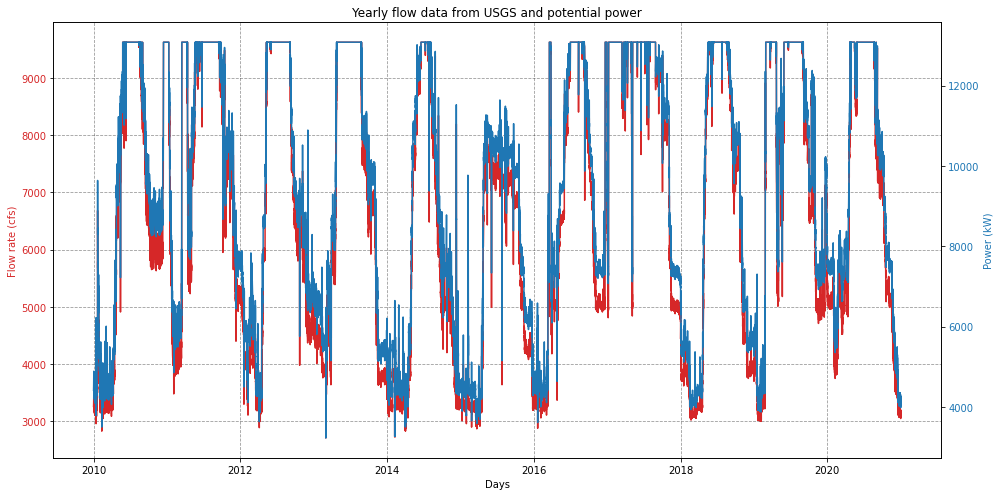

In [4]:
# Plot results
# Columns:  discharge_cfs   site_id     power_kW  efficiency   energy_kWh
plt.rcParams['figure.figsize'] = [14, 7]

df = hp.dataframe_output.copy()
fig, ax1 = plt.subplots()


color_plot = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Flow rate (cfs)', color=color_plot)
ax1.plot(df['turbine_flow_cfs'], label="Flow rate", color=color_plot)
ax1.tick_params(axis='y', labelcolor=color_plot)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color_plot2 = 'tab:blue'
ax2.set_ylabel('Power (kW)', color=color_plot2)  # we already handled the x-label with ax1
ax2.plot(df['power_kW'],'b-',label="Power", color=color_plot2)
ax2.tick_params(axis='y', labelcolor=color_plot2)
ax1.grid(True, axis='both', color='k',linestyle='--',alpha=0.4)
plt.title("Yearly flow data from USGS and potential power")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig(os.path.join('..','fig','usgs_twin_falls_flow_power.jpg'))
plt.show()

2.2) Use streamflow data from a USGS stream gauge. 

The USGS has a Python package (**_dataretrieval_**) designed to simplify the process of loading hydrologic data into the Python environment. **_dataretrieval_** can be pip installed into a Python environment. The example code shows how to donwload data using **_dataretrieval_** and format it for hydropower potential evaluation in **_HydroGenerate_**. The example used, and additional information, is avlaiable as a [HydroShare Resource](http://www.hydroshare.org/resource/c97c32ecf59b4dff90ef013030c54264). Information about **_dataretrieval_** is avaliable directly on the [USGS GitHUb Repository](https://github.com/DOI-USGS/dataretrieval-python).

In [5]:
# Install dataretrieval, if it doesn't exist in Python environment using pip install dataretrieval

In [6]:
# import data retrieval
from dataretrieval import nwis

In [7]:
# Set the parameters needed to retrieve data
siteNumber = "10109000" # LOGAN RIVER ABOVE STATE DAM, NEAR LOGAN, UT
parameterCode = "00060" # Discharge
startDate = "2010-01-01"
endDate = "2020-12-31"

# Retrieve the data
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 

In [8]:
# convert to pandas dataframe
flow = pd.DataFrame(dailyStreamflow[0])
flow.head()

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2010-01-01 00:00:00+00:00,108.0,A,10109000
2010-01-02 00:00:00+00:00,107.0,A,10109000
2010-01-03 00:00:00+00:00,106.0,A,10109000
2010-01-04 00:00:00+00:00,102.0,A,10109000
2010-01-05 00:00:00+00:00,105.0,A,10109000


In [9]:
# Use the streamflow data from a USGS stream gauge - Cont.
# The flow data for this example was created in the previous step. 
head = 100 # ft
power = None
penstock_length = 120 # ft
hp_type = 'Diversion' 
flow_column = '00060_Mean'  # name of the column containing the flow data

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                            penstock_headloss_calculation= True,
                           hydropower_type= hp_type, penstock_length= penstock_length,
                           flow_column= flow_column, annual_caclulation= True)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter,2))
print('Runner diameter (ft):', round(hp.runner_diameter,2))

print('\nPandas dataframe output: \n', hp.dataframe_output)
print('Annual output: \n', hp.annual_dataframe_output)

Design flow (cfs): 200.0
Head_loss at design flow (ft): 8.94
Turbine type: Kaplan
Rated Power (Kw): 1385.2
Net head (ft): 91.06
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 120.0
Penstock diameter (ft): 3.31
Runner diameter (ft): 3.43

Pandas dataframe output: 
                            00060_Mean 00060_Mean_cd   site_no    power_kW  turbine_flow_cfs  efficiency    energy_kWh
datetime                                                                                                             
2010-01-01 00:00:00+00:00       108.0             A  10109000  798.711407             108.0    0.915145           NaN
2010-01-02 00:00:00+00:00       107.0             A  10109000  791.503752             107.0    0.914911  18996.090056
2010-01-03 00:00:00+00:00       106.0             A  10109000  784.264006             106.0    0.914648  18822.336153
2010-01-04 00:00:00+00:00       102.0             A  10109000  754.951157             102.0    0.913246  18118

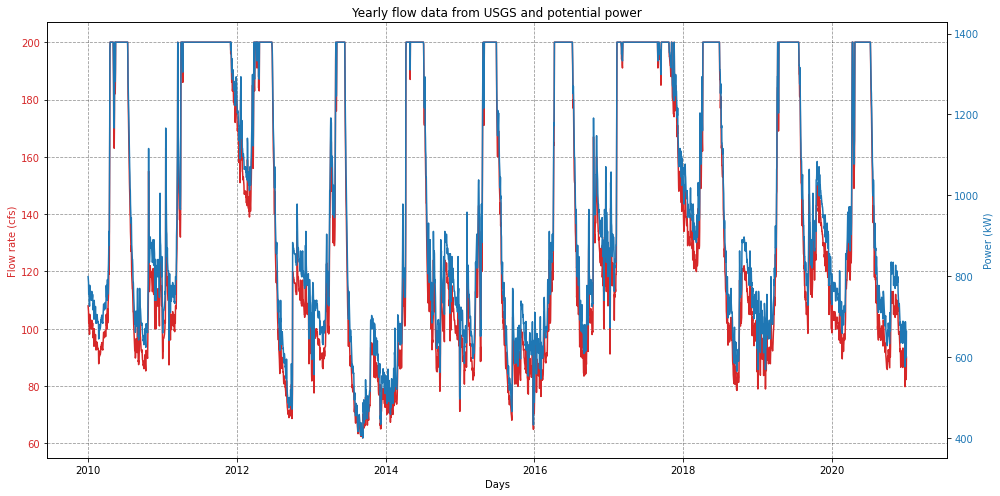

In [10]:
# Plot results
# Columns:  discharge_cfs   site_id     power_kW  efficiency   energy_kWh

df = hp.dataframe_output.copy()
fig, ax1 = plt.subplots()


color_plot = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Flow rate (cfs)', color=color_plot)
ax1.plot(df['turbine_flow_cfs'], label="Flow rate", color=color_plot)
ax1.tick_params(axis='y', labelcolor=color_plot)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color_plot2 = 'tab:blue'
ax2.set_ylabel('Power (kW)', color=color_plot2)  # we already handled the x-label with ax1
ax2.plot(df['power_kW'],'b-',label="Power", color=color_plot2)
ax2.tick_params(axis='y', labelcolor=color_plot2)
ax1.grid(True, axis='both', color='k',linestyle='--',alpha=0.4)
plt.title("Yearly flow data from USGS and potential power")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig(os.path.join('..','fig','usgs_twin_falls_flow_power.jpg'))
plt.show()